# Определение перспективного тарифа для телеком компании

## Описание проекта 

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


### Описание тарифов
#### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
#### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей


Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [2]:
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [4]:
df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [5]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Вывод

Дано 5 таблиц, из которых 2 - общие (тарифы и пользователи), остальные содержат информацию для анализа. Данных о количестве звонков больше, эта информация пригодится при дальнейшем соединении таблиц (от большего к меньшему), чтобы значения не потерялись.

### Шаг 2. Подготовьте данные
- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных.
- Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что у большого количества звонков длительность — 0.0 минут.
Это проблема в данных, нужна предобработка.

In [7]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# согласно условию, звонки округляются в большую сторону, то есть duration можно округлить в большую сторону
# значение 0 - скорее всего, это неправильное округление базой данных. То есть, можно предположить, что звонок прошел и сбросился

df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.loc[df_calls['duration'] == 0, 'duration'] = 1.00
df_calls['duration'] = df_calls['duration'].astype(int)

df_calls['month'] = df_calls['call_date'].dt.month
df_calls
# остальные столбцы впорядке

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


#### Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [8]:
# Считаем количество сделанных звонков и израсходованных минут разговора по месяцам
df_calls_pivot = df_calls.merge(df_users, on='user_id', how='left')
df_calls_pivot = df_calls_pivot.pivot_table(
    index=['user_id', 'tariff', 'month'],
    values='duration',
    aggfunc={'count', 'sum'}
)
df_calls_pivot.columns = ['Количество сделанных звонков', 'Количество израсходованных минут разговора']
df_calls_pivot

Количество сделанных звонков  \
user_id tariff month                                 
1000    ultra  5                                22   
               6                                43   
               7                                47   
               8                                52   
               9                                58   
...                                            ...   
1498    smart  10                               41   
1499    smart  9                                 9   
               10                               68   
               11                               74   
               12                               69   

                      Количество израсходованных минут разговора  
user_id tariff month                                              
1000    ultra  5                                             164  
               6                                             187  
               7                                             346  
               8                                             418  
               9                                             478  
...                                                          ...  
1498    smart  10                                            258  
1499    smart  9                                              71  
               10                                            473  
               11                                            624  
               12                                            505  

[3174 rows x 2 columns]

In [9]:
# Считаем количество отправленных сообщений по месяцам
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month

df_messages_pivot = df_messages.merge(df_users, on='user_id', how='left')
df_messages_pivot = df_messages_pivot.pivot_table(
    index=['user_id', 'tariff', 'month'],
    values='id',
    aggfunc='count',
)
df_messages_pivot.columns = ['Количество отправленных сообщений']
df_messages_pivot

Количество отправленных сообщений
user_id tariff month                                   
1000    ultra  5                                     22
               6                                     60
               7                                     75
               8                                     81
               9                                     57
...                                                 ...
1498    smart  10                                    42
1499    smart  9                                     11
               10                                    48
               11                                    59
               12                                    66

[2717 rows x 1 columns]

In [10]:
# Считаем объем израсходованного интернет-трафика по месяцам
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])
df_internet['mb_used'] = df_internet['mb_used'].astype(int)

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month

df_internet_pivot = df_internet.merge(df_users, on='user_id', how='left')
df_internet_pivot = df_internet_pivot.pivot_table(
    index=['user_id', 'tariff', 'month'],
    values='mb_used',
    aggfunc='sum',
)
df_internet_pivot.columns = ['Объем израсходованного интернет-трафика, мб.']
df_internet_pivot

Объем израсходованного интернет-трафика, мб.
user_id tariff month                                              
1000    ultra  5                                              2256
               6                                             23257
               7                                             14016
               8                                             14070
               9                                             14581
...                                                            ...
1498    smart  10                                            20604
1499    smart  9                                              1848
               10                                            17809
               11                                            17984
               12                                            13077

[3203 rows x 1 columns]

In [11]:
# Считаем помесячную выручку с каждого пользователя
df_calls_pivot.drop(['Количество сделанных звонков'], axis='columns', inplace=True) # количество звонков больше не нужно
df_revenue_0 = df_internet_pivot.join(df_calls_pivot, on=['user_id', 'tariff', 'month'])
df_revenue = df_revenue_0.join(df_messages_pivot, on=['user_id', 'tariff', 'month'])
df_revenue = df_revenue.reset_index()
df_revenue

,user_id,tariff,month,"Объем израсходованного интернет-трафика, мб.",Количество израсходованных минут разговора,Количество отправленных сообщений
0,1000,ultra,5,2256,164.0,22.0
1,1000,ultra,6,23257,187.0,60.0
2,1000,ultra,7,14016,346.0,75.0
3,1000,ultra,8,14070,418.0,81.0
4,1000,ultra,9,14581,478.0,57.0
...,...,...,...,...,...,...
3198,1498,smart,10,20604,258.0,42.0
3199,1499,smart,9,1848,71.0,11.0
3200,1499,smart,10,17809,473.0,48.0
3201,1499,smart,11,17984,624.0,59.0


In [12]:
# Делаем функцию, которая считает выручку помесячно по пользователю, если он превысил бесплтный лимит в тарифе за интернет
def revenue_int(row):
    internet = row['Объем израсходованного интернет-трафика, мб.']
    tariff = row['tariff']
    if (tariff == 'ultra') & (internet > df_tariffs['mb_per_month_included'][1]):
        return (internet - df_tariffs['mb_per_month_included'][1]) * (df_tariffs['rub_per_gb'][1] / 1000) 
    if (tariff == 'ultra') & (internet < df_tariffs['mb_per_month_included'][1]):
        return 0
    if (tariff == 'smart') & (internet > df_tariffs['mb_per_month_included'][0]):
        return (internet - df_tariffs['mb_per_month_included'][0]) * (df_tariffs['rub_per_gb'][0] / 1000) 
    if (tariff == 'smart') & (internet < df_tariffs['mb_per_month_included'][0]):
        return 0
df_revenue['Выручка за интернет'] = df_revenue.apply(revenue_int, axis=1)
df_revenue

,user_id,tariff,month,"Объем израсходованного интернет-трафика, мб.",Количество израсходованных минут разговора,Количество отправленных сообщений,Выручка за интернет
0,1000,ultra,5,2256,164.0,22.0,0.0
1,1000,ultra,6,23257,187.0,60.0,0.0
2,1000,ultra,7,14016,346.0,75.0,0.0
3,1000,ultra,8,14070,418.0,81.0,0.0
4,1000,ultra,9,14581,478.0,57.0,0.0
...,...,...,...,...,...,...,...
3198,1498,smart,10,20604,258.0,42.0,1048.8
3199,1499,smart,9,1848,71.0,11.0,0.0
3200,1499,smart,10,17809,473.0,48.0,489.8
3201,1499,smart,11,17984,624.0,59.0,524.8


In [13]:
# Делаем функцию, которая считает выручку помесячно по пользователю, если он превысил бесплтный лимит в тарифе за сообщения
def revenue_mes(row):
    messages = row['Количество отправленных сообщений']
    tariff = row['tariff']
    if (tariff == 'ultra') & (messages > df_tariffs['messages_included'][1]):
        return (messages - df_tariffs['messages_included'][1]) * df_tariffs['rub_per_message'][1] 
    if (tariff == 'ultra') & (messages < df_tariffs['messages_included'][1]):
        return 0
    if (tariff == 'smart') & (messages > df_tariffs['messages_included'][0]):
        return (messages - df_tariffs['messages_included'][0]) * df_tariffs['rub_per_message'][0] 
    if (tariff == 'smart') & (messages < df_tariffs['messages_included'][0]):
        return 0
    else:
        return 0
df_revenue['Выручка за сообщения'] = df_revenue.apply(revenue_mes, axis=1)
df_revenue

,user_id,tariff,month,"Объем израсходованного интернет-трафика, мб.",Количество израсходованных минут разговора,Количество отправленных сообщений,Выручка за интернет,Выручка за сообщения
0,1000,ultra,5,2256,164.0,22.0,0.0,0.0
1,1000,ultra,6,23257,187.0,60.0,0.0,0.0
2,1000,ultra,7,14016,346.0,75.0,0.0,0.0
3,1000,ultra,8,14070,418.0,81.0,0.0,0.0
4,1000,ultra,9,14581,478.0,57.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3198,1498,smart,10,20604,258.0,42.0,1048.8,0.0
3199,1499,smart,9,1848,71.0,11.0,0.0,0.0
3200,1499,smart,10,17809,473.0,48.0,489.8,0.0
3201,1499,smart,11,17984,624.0,59.0,524.8,27.0


In [14]:
# Делаем функцию, которая считает выручку помесячно по пользователю, если он превысил бесплтный лимит в тарифе за минуты
def revenue_min(row):
    minutes = row['Количество израсходованных минут разговора']
    tariff = row['tariff']
    if (tariff == 'ultra') & (minutes > df_tariffs['minutes_included'][1]):
        return (minutes - df_tariffs['minutes_included'][1]) * df_tariffs['rub_per_minute'][1] 
    if (tariff == 'ultra') & (minutes < df_tariffs['minutes_included'][1]):
        return 0
    if (tariff == 'smart') & (minutes > df_tariffs['minutes_included'][0]):
        return (minutes - df_tariffs['minutes_included'][0]) * df_tariffs['rub_per_minute'][0] 
    if (tariff == 'smart') & (minutes < df_tariffs['minutes_included'][0]):
        return 0
    else:
        return 0
df_revenue['Выручка за минуты'] = df_revenue.apply(revenue_min, axis=1)
df_revenue

,user_id,tariff,month,"Объем израсходованного интернет-трафика, мб.",Количество израсходованных минут разговора,Количество отправленных сообщений,Выручка за интернет,Выручка за сообщения,Выручка за минуты
0,1000,ultra,5,2256,164.0,22.0,0.0,0.0,0.0
1,1000,ultra,6,23257,187.0,60.0,0.0,0.0,0.0
2,1000,ultra,7,14016,346.0,75.0,0.0,0.0,0.0
3,1000,ultra,8,14070,418.0,81.0,0.0,0.0,0.0
4,1000,ultra,9,14581,478.0,57.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3198,1498,smart,10,20604,258.0,42.0,1048.8,0.0,0.0
3199,1499,smart,9,1848,71.0,11.0,0.0,0.0,0.0
3200,1499,smart,10,17809,473.0,48.0,489.8,0.0,0.0
3201,1499,smart,11,17984,624.0,59.0,524.8,27.0,372.0


In [15]:
# Делаем функцию, которая считает выручку помесячно по пользователю за использование тарифа
def revenue_month(row):
    tariff = row['tariff']
    if tariff == 'ultra':
        return df_tariffs['rub_monthly_fee'][1]
    else:
        return df_tariffs['rub_monthly_fee'][0]
df_revenue['Выручка за тариф'] = df_revenue.apply(revenue_month, axis=1)
df_revenue

,user_id,tariff,month,"Объем израсходованного интернет-трафика, мб.",Количество израсходованных минут разговора,Количество отправленных сообщений,Выручка за интернет,Выручка за сообщения,Выручка за минуты,Выручка за тариф
0,1000,ultra,5,2256,164.0,22.0,0.0,0.0,0.0,1950
1,1000,ultra,6,23257,187.0,60.0,0.0,0.0,0.0,1950
2,1000,ultra,7,14016,346.0,75.0,0.0,0.0,0.0,1950
3,1000,ultra,8,14070,418.0,81.0,0.0,0.0,0.0,1950
4,1000,ultra,9,14581,478.0,57.0,0.0,0.0,0.0,1950
...,...,...,...,...,...,...,...,...,...,...
3198,1498,smart,10,20604,258.0,42.0,1048.8,0.0,0.0,550
3199,1499,smart,9,1848,71.0,11.0,0.0,0.0,0.0,550
3200,1499,smart,10,17809,473.0,48.0,489.8,0.0,0.0,550
3201,1499,smart,11,17984,624.0,59.0,524.8,27.0,372.0,550


In [16]:
df_revenue['Общая выручка'] = (
    df_revenue['Выручка за тариф']
    + df_revenue['Выручка за интернет']
    + df_revenue['Выручка за сообщения']
    + df_revenue['Выручка за минуты']
)

In [17]:
df_revenue = df_revenue.fillna(0)
df_revenue['Выручка за интернет'] = df_revenue['Выручка за интернет'].astype(int)
df_revenue['Выручка за сообщения'] = df_revenue['Выручка за минуты'].astype(int)
df_revenue['Выручка за минуты'] = df_revenue['Выручка за минуты'].astype(int)
df_revenue['Выручка за тариф'] = df_revenue['Выручка за тариф'].astype(int)
df_revenue['Общая выручка'] = df_revenue['Общая выручка'].astype(int)

In [18]:
df_revenue

,user_id,tariff,month,"Объем израсходованного интернет-трафика, мб.",Количество израсходованных минут разговора,Количество отправленных сообщений,Выручка за интернет,Выручка за сообщения,Выручка за минуты,Выручка за тариф,Общая выручка
0,1000,ultra,5,2256,164.0,22.0,0,0,0,1950,1950
1,1000,ultra,6,23257,187.0,60.0,0,0,0,1950,1950
2,1000,ultra,7,14016,346.0,75.0,0,0,0,1950,1950
3,1000,ultra,8,14070,418.0,81.0,0,0,0,1950,1950
4,1000,ultra,9,14581,478.0,57.0,0,0,0,1950,1950
...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,smart,10,20604,258.0,42.0,1048,0,0,550,1598
3199,1499,smart,9,1848,71.0,11.0,0,0,0,550,550
3200,1499,smart,10,17809,473.0,48.0,489,0,0,550,1039
3201,1499,smart,11,17984,624.0,59.0,524,372,372,550,1473


In [19]:
df_revenue.pivot_table(
    index=['user_id', 'month',],
    values='Общая выручка',
    aggfunc='sum',
)

Общая выручка
user_id month               
1000    5               1950
        6               1950
        7               1950
        8               1950
        9               1950
...                      ...
1498    10              1598
1499    9                550
        10              1039
        11              1473
        12               613

[3203 rows x 1 columns]

### Вывод

Мы рассмотрели данные в разрезе по пользователям вместе с их тарифамм по:
- количеству сделанных звонков и израсходованным минутам разговора помесячно,
- количеству отправленных сообщений по месяцам,
- объему израсходованного интернет-трафика по месяцам;

Затем мы посчитали помесячную выручку с каждого пользователя.

### Шаг 3. Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки.
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
Посчитайте среднее количество, дисперсию и стандартное отклонение.
Постройте гистограммы. 
Опишите распределения.

In [22]:
df_smart = df_revenue.query('tariff == "smart"')
df_ultra = df_revenue.query('tariff == "ultra"')

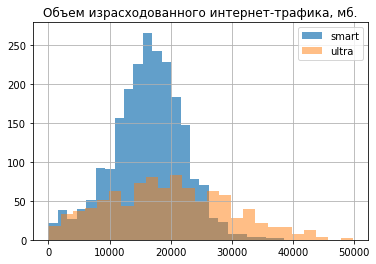

Среднее для тарифа smart - 16236.47262118492
Дисперсия тарифа smart - 34443100.68133359
Стандартное отклонение по тарифу smart - 5868.824471845583
Среднее для тарифа ultra - 19686.76717948718
Дисперсия тарифа ultra - 99043439.60795662
Стандартное отклонение по тарифу ultra - 9952.057054094726


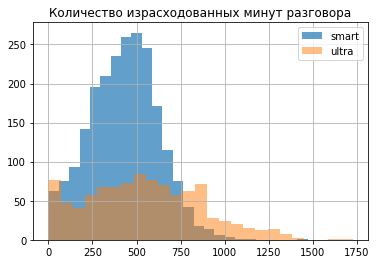

Среднее для тарифа smart - 429.62118491921007
Дисперсия тарифа smart - 37927.14426586072
Стандартное отклонение по тарифу smart - 194.7489262251803
Среднее для тарифа ultra - 543.974358974359
Дисперсия тарифа ultra - 106122.44800716052
Стандартное отклонение по тарифу ultra - 325.7644056786446


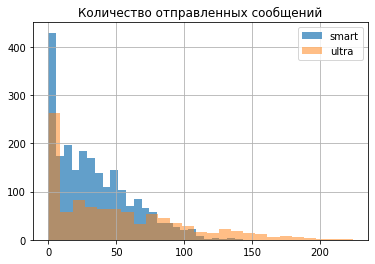

Среднее для тарифа smart - 33.398563734290846
Дисперсия тарифа smart - 796.6996297278624
Стандартное отклонение по тарифу smart - 28.22586809520413
Среднее для тарифа ultra - 49.585641025641024
Дисперсия тарифа ultra - 2301.9246396040644
Стандартное отклонение по тарифу ultra - 47.97837679209317


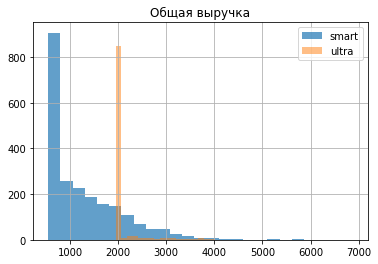

Среднее для тарифа smart - 1263.3958707360862
Дисперсия тарифа smart - 660686.8095383971
Стандартное отклонение по тарифу smart - 812.8264326031709
Среднее для тарифа ultra - 2064.2779487179487
Дисперсия тарифа ultra - 134257.04278839572
Стандартное отклонение по тарифу ultra - 366.4110298399814


In [23]:
def compare(df_1, df_2):
    columns = [
        'Объем израсходованного интернет-трафика, мб.',
        'Количество израсходованных минут разговора',
        'Количество отправленных сообщений',
        'Общая выручка'
]
    for i in columns:
        ax = df_1.hist(column=i, bins=25, alpha=0.7, label='smart')
        df_2.hist(column=i, bins=25, alpha=0.5, label='ultra', ax=ax)
        plt.legend(loc='upper right')
        plt.show()
        print('Среднее для тарифа smart -', df_smart[i].mean())
        print('Дисперсия тарифа smart -', np.var(df_smart[i], ddof=1))
        print('Стандартное отклонение по тарифу smart -', np.std(df_smart[i], ddof=1))
        print('Среднее для тарифа ultra -', df_ultra[i].mean())
        print('Дисперсия тарифа ultra -', np.var(df_ultra[i], ddof=1))
        print('Стандартное отклонение по тарифу ultra -', np.std(df_ultra[i], ddof=1))
compare(df_smart, df_ultra)

### Вывод

Мы рассмотрели два тарифа компании Мегалайн в отношении объема израсходованного интернет-трафика, количества израсходованных минут разговора и количества отправленных сообщений.

Средний объем израсходованного интернет-трафика для тарифа smart - 16236.47 мб., для тарифа ultra - 19686.76 мб.
Стандартное отклонение израсходованного интернет-трафика для тарифов smart и ultra - 5868.82 мб. и 9952.05 мб. соответственно. 
То есть, по тарифу ultra разброс значений больше.
У тарифа смарт включено в пакет 15 Гб бесплатного интернета, а как мы рассмотрели, среднее уже превышает количество бесплтных Гб.

Среднее количество израсходованных минут разговора для тарифа smart - 430.78, для тарифа ultra - 563.62
Стандартное отклонение количества израсходованных минут разговора для тарифов smart и ultra - 193.72 и 314.43 соответственно. 
То есть, по тарифу ultra разброс значений больше.

Среднее количество отправленных сообщений для тарифа smart - 38.73, для тарифа ultra - 61.58
Стандартное отклонение количества отправленных сообщений для тарифов smart и ultra - 26.78 и 46.04 соответственно. 
То есть, по тарифу ultra разброс значений больше.

### Шаг 4. Проверьте гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

Проверяем гипотезы. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, то есть нулевую гипотезу нужно сформулировать так, чтобы средние выручки были равны. Так мы сможем придти к выводу, что данные не противоречат гипотезе, либо наоборот, показывают крайне маловероятные результаты. Чем меньше значение р, тем сильнее аргументы против нулевой гипотезы.

#### Проверка гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
H_0 - средняя выручка пользователей тарифов "Ультра" и "Смарт" равна

Н_1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" не равна

In [21]:
# Делаем выборку по 2-м тарифам
df_revenue_ultra = df_revenue.query('tariff == "ultra"')
df_revenue_smart = df_revenue.query('tariff == "smart"')

In [22]:
alpha = 0.05
results = st.ttest_ind(df_revenue_ultra['Общая выручка'], df_revenue_smart['Общая выручка'], equal_var = False)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Pvalue -', results.pvalue)

Отвергаем нулевую гипотезу
Pvalue - 7.668740982812049e-266


In [23]:
df_revenue.groupby('tariff')['Общая выручка'].sum()/df_revenue.groupby('tariff').user_id.count()

tariff
smart    1263.632585
ultra    2064.343538
dtype: float64

Н_0 - отвергнута.

#### Проверка гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
H_0 - средняя выручка пользователей Москвы равна средней выручке пользователей из других регионов

Н_1 - средняя выручка пользователей Москвы не равна средней выручке пользователей из других регионов

In [24]:
df_revenue = df_revenue.merge(df_users, on=['user_id', 'tariff'])
df_revenue_moscow = df_revenue.query('city == "Москва"')
df_revenue_other = df_revenue.query('city not in "Москва"')

In [51]:
alpha = 0.05
results = st.ttest_ind(df_revenue_moscow['Общая выручка'], df_revenue_other['Общая выручка'], equal_var = False)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Pvalue -', results.pvalue)
print('Средняя выручка в Москве - ', df_revenue_moscow['Общая выручка'].mean())
print('Средняя выручка не в Москве - ', df_revenue_other['Общая выручка'].mean())

Не получилось отвергнуть нулевую гипотезу
Pvalue - 0.5088689884059738
Средняя выручка в Москве -  1525.6638297872341
Средняя выручка не в Москве -  1503.0585455246915


### Вывод

Н_0 - мы не можем отвергнуть эту гипотезу. Аргументов недостаточно, чтобы отвергнуть нулевую гипотезу. Результаты не значимы на 5% уровне.

Мы отвергли нулевую гипотезу о том, что выручка по двум тарифам равна, а также нам не получилось овтергнуть гипотезу о том, что средняя выручка пользователей Москвы равна средней выручке пользователей из других регионов.

Стандартная цена тарифа smart - 550 рублей, против тарифа ultra - 1950 рублей. В среднем, выручка с пользователя тарифа smart - 1263 рублей, ultra - 2064 рубля. По тарифу смарт больше пользуются дополнительными платными услугами, чем по тарифу ultra. С тарифом smart - 351 пользователь, с ultra - 149.